<a href="https://colab.research.google.com/github/rlawnsqja2/2024-1-my-BDA/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 데이터

In [249]:
import sys

In [250]:
import seaborn as sns
import pandas as pd
import csv

In [251]:
import matplotlib.pyplot as plt
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [252]:
%config InlineBackend.figure_format = 'retina'

#**타이타닉 데이터 분석**

In [253]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [254]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='sex', ylabel='count'>

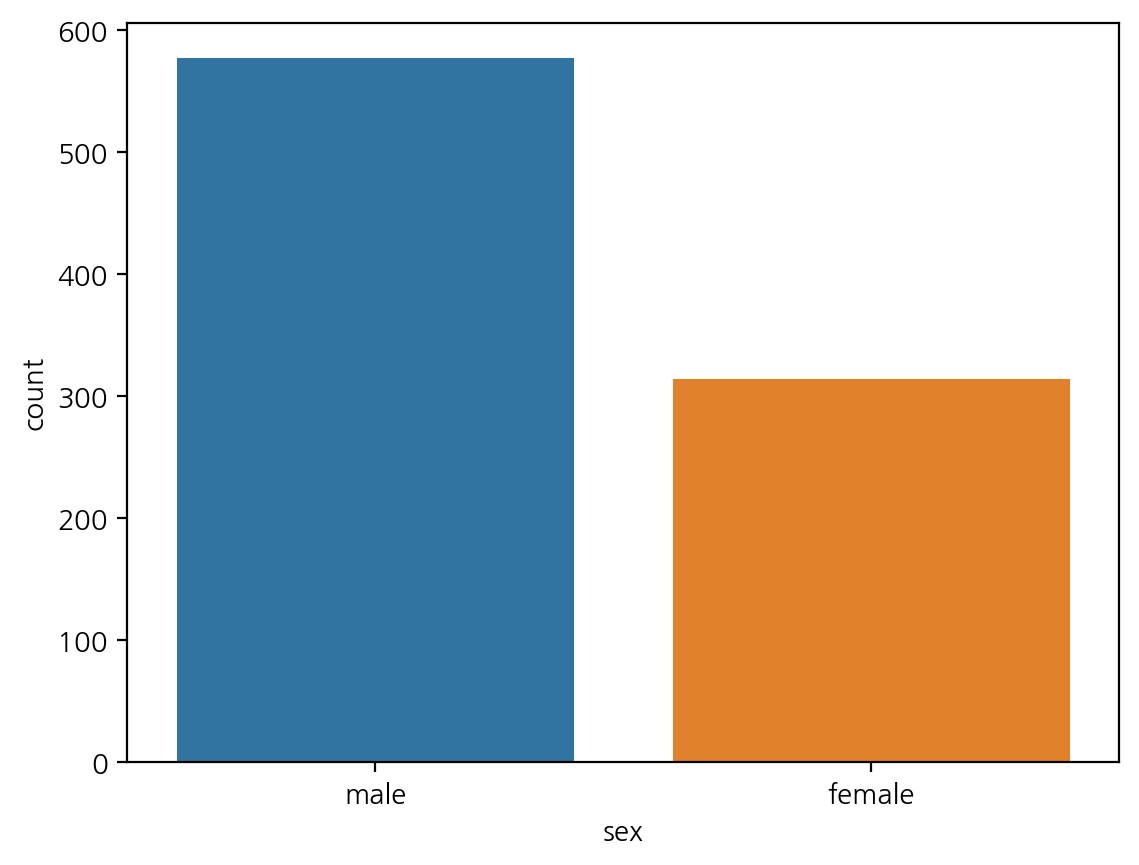

In [255]:
sns.countplot(titanic, x="sex", hue="sex")

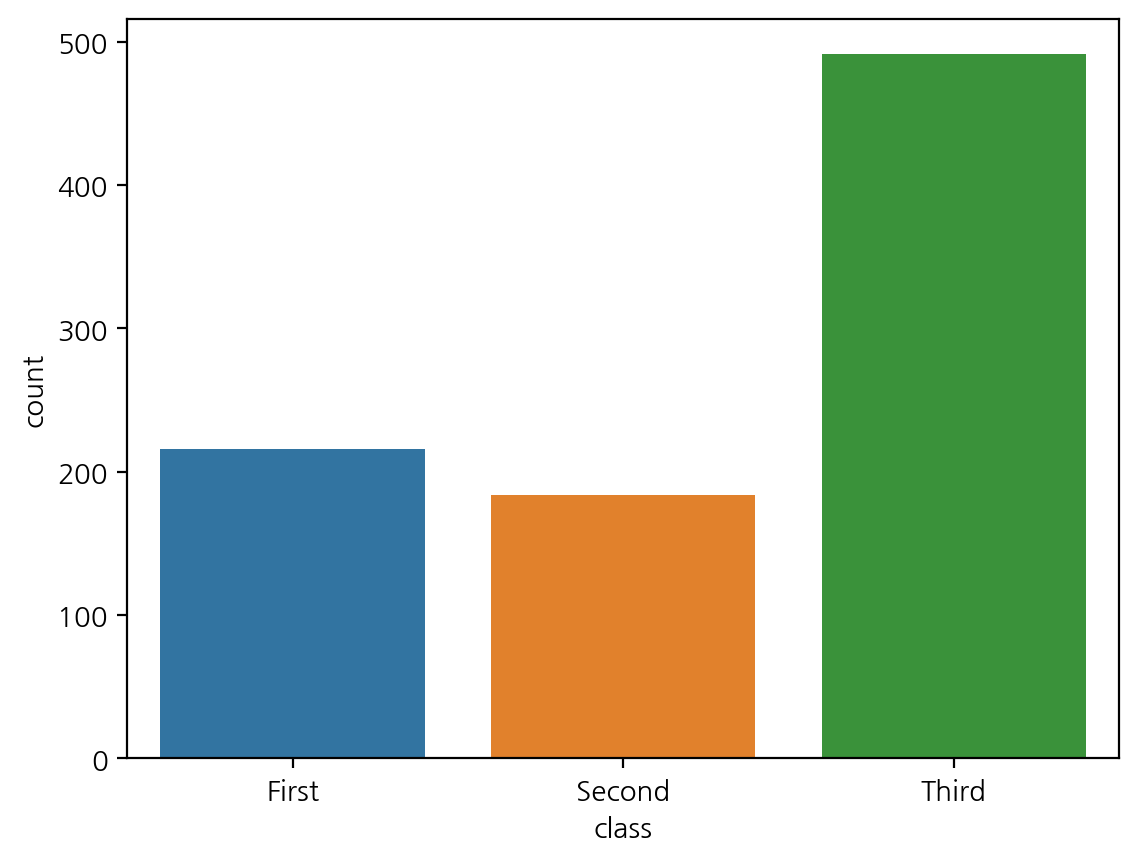

In [256]:
sns.countplot(titanic, x="class", hue="class");

<Axes: xlabel='deck', ylabel='count'>

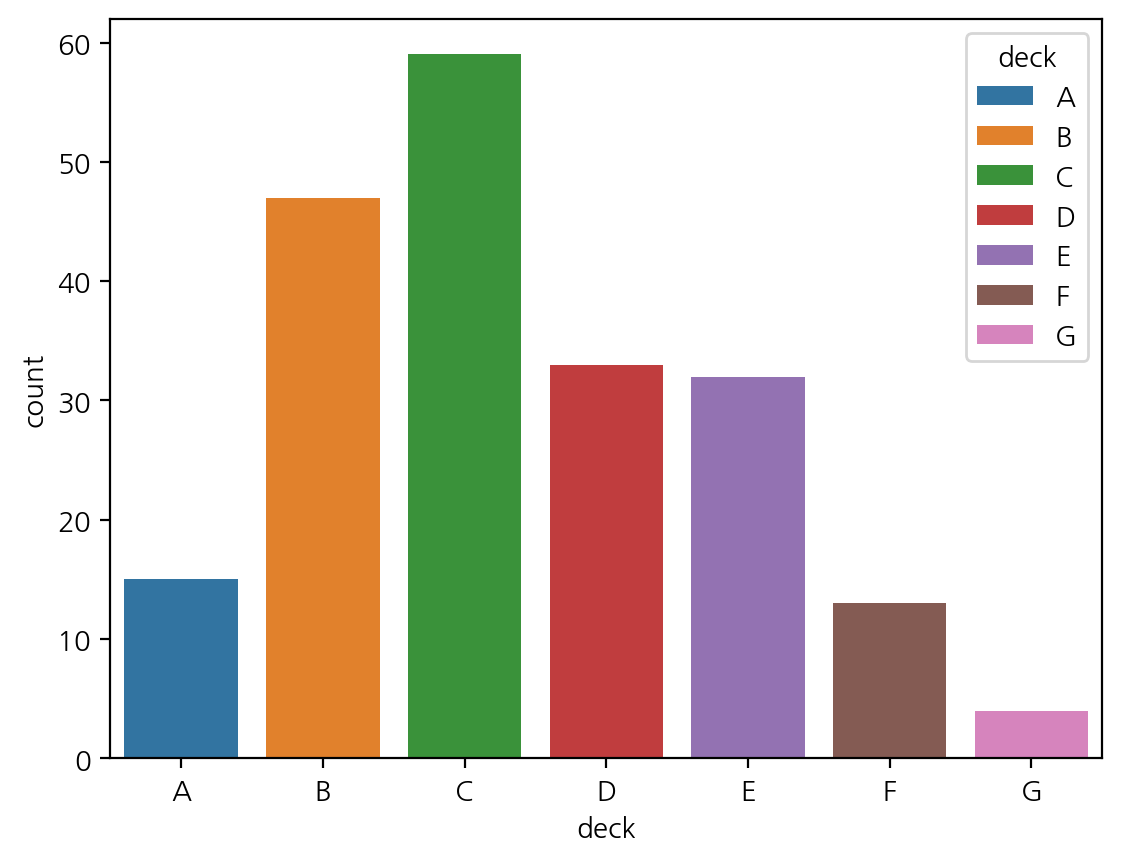

In [257]:
sns.countplot(titanic, x="deck", hue="deck")

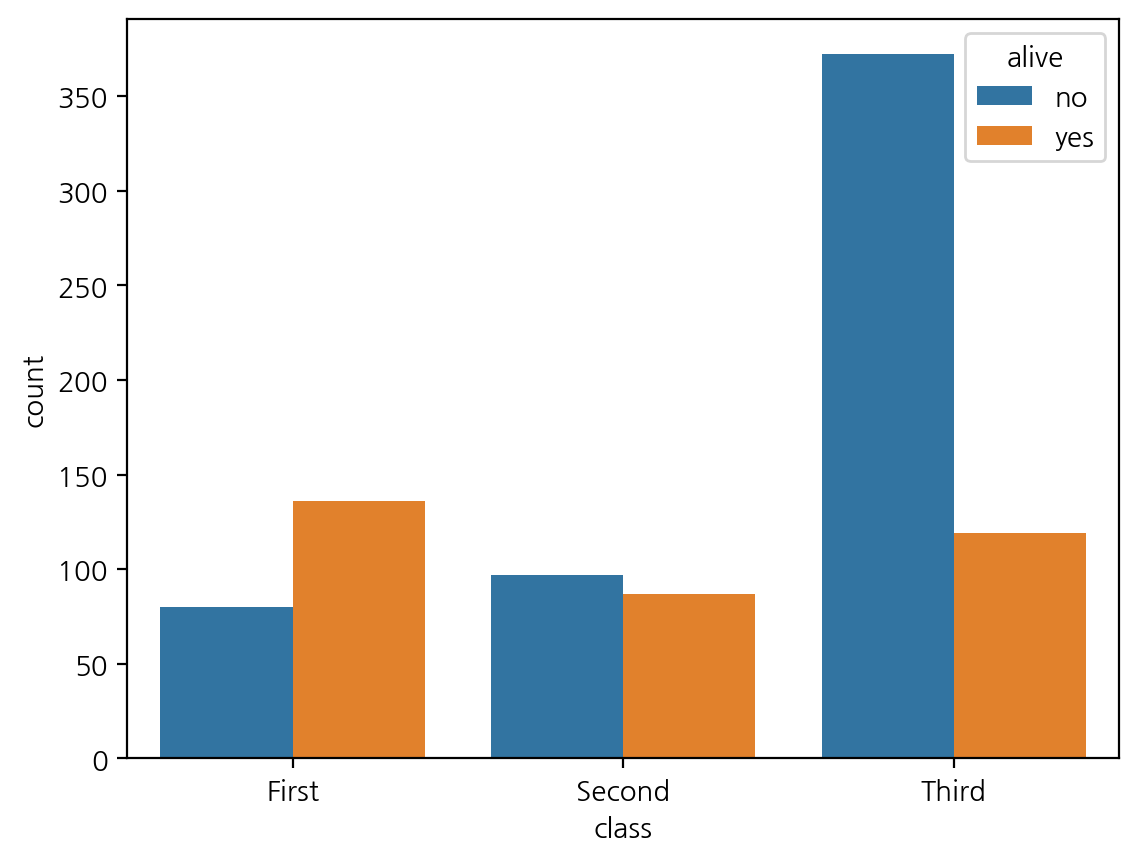

In [258]:
sns.countplot(titanic, x="class", hue="alive");

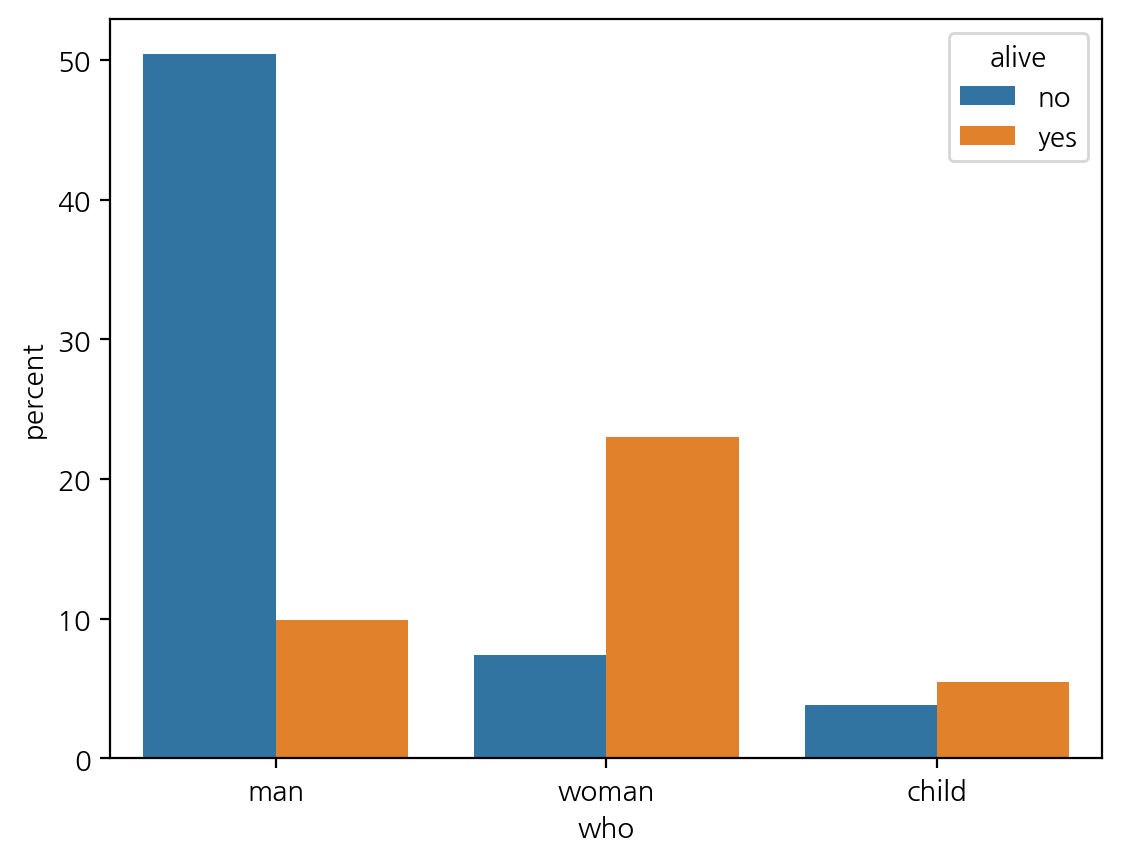

In [259]:
sns.countplot(titanic, x = "who", hue = "alive", stat = "percent");

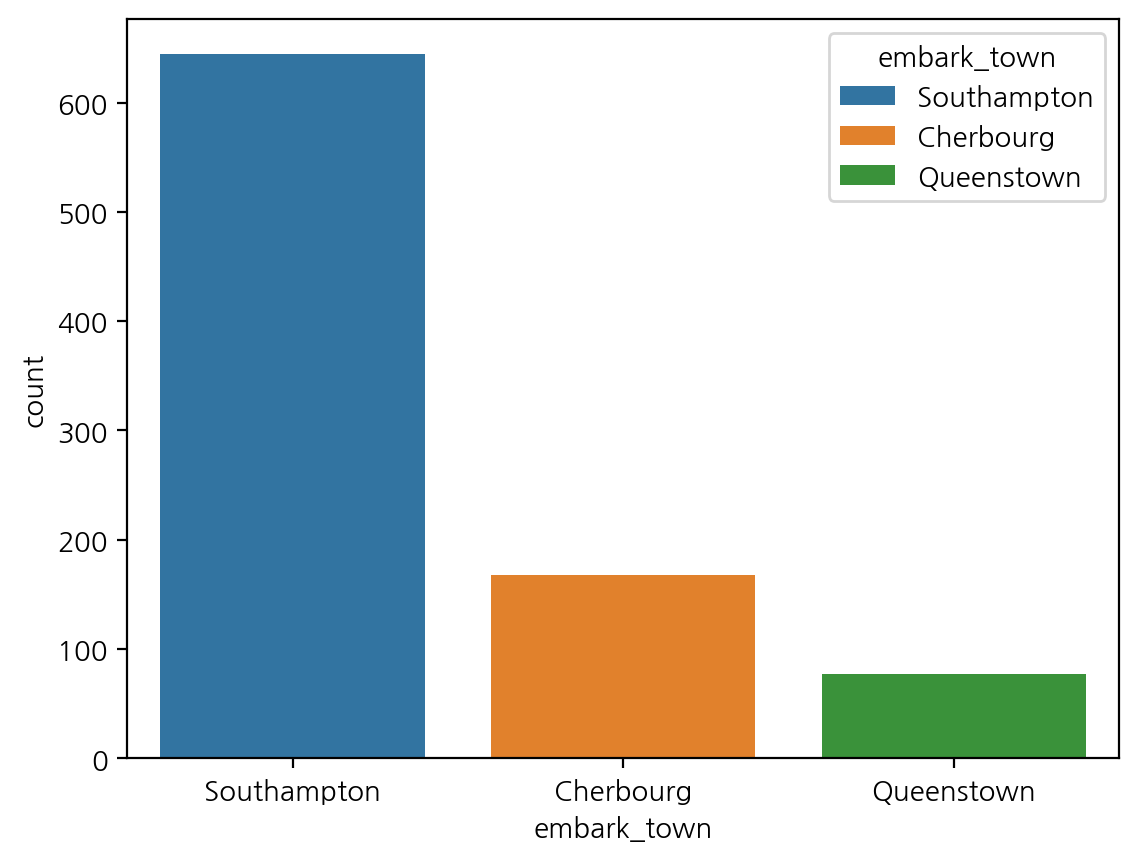

In [260]:
sns.countplot(titanic, x="embark_town", hue="embark_town");

In [261]:
titanic.sex.isna().sum()

0

In [262]:
titanic.age.isna().sum()

177

In [263]:
titanic.alive.isna().sum()

0

In [264]:
titanic.embark_town.isna().sum()

2

#**해양쓰레기 데이터 분석**

In [265]:
trash = pd.read_csv('해양환경공단_해양쓰레기 조사_지역별_20221231.txt', sep = ',')
trash

,구분,조사면적,추정량
0,평택시,0,0.0
1,안산시,0,0.0
2,시흥시,0,0.0
3,김포시,0,0.0
4,화성시,0,0.0
...,...,...,...
85,부안군,0,0.0
86,고창군,0,0.0
87,김제시,0,0.0
88,제주시,15226,212.9


In [266]:
경기도 = trash.drop(range(7, 90))
경기도

,구분,조사면적,추정량
0,평택시,0,0.0
1,안산시,0,0.0
2,시흥시,0,0.0
3,김포시,0,0.0
4,화성시,0,0.0
5,군포시,0,0.0
6,안산환경재단,0,0.0


In [267]:
경기도 = 경기도.sum().to_frame()  # 경기도지역의 해양쓰레기 합산
경기도

,0
구분,평택시안산시시흥시김포시화성시군포시안산환경재단
조사면적,0
추정량,0.0


In [268]:
경기도 = 경기도.transpose()  # 행렬변환
경기도

,구분,조사면적,추정량
0,평택시안산시시흥시김포시화성시군포시안산환경재단,0,0.0


In [269]:
경기도.loc[0, '구분'] = '경기도'
경기도

,구분,조사면적,추정량
0,경기도,0,0.0


In [270]:
인천광역시 = trash.drop(range(0, 7)).drop(range(15, 90))
인천광역시

,구분,조사면적,추정량
7,중구,1060,100.0
8,남동구,0,0.0
9,동구,0,0.0
10,서구,0,0.0
11,강화군,0,0.0
12,옹진군,0,0.0
13,연수구,0,0.0
14,인천해양경찰서,0,0.0


In [271]:
인천광역시 = 인천.sum().to_frame().transpose()
인천광역시.loc[0, '구분'] = '인천광역시'
인천광역시

,구분,조사면적,추정량
0,인천광역시,1060,100.0


In [272]:
강원도 = trash.drop(range(0, 15)).drop(range(22, 90))
강원도

,구분,조사면적,추정량
15,강릉시,30,11.0
16,속초시,0,0.0
17,고성군,0,0.0
18,동해시,0,0.0
19,삼척시,300,2.2
20,양양군,1500,3.0
21,강원도청,0,0.0


In [273]:
강원도 = 강원도.sum().to_frame().transpose()
강원도.loc[0, '구분'] = '강원도'
강원도

,구분,조사면적,추정량
0,강원도,1830,16.2


In [274]:
충청도 = trash.drop(range(0, 22)).drop(range(29, 90))
충청도

,구분,조사면적,추정량
22,보령시,0,0.0
23,아산시,0,0.0
24,서산시,350,123.1
25,서천군,25,0.0
26,홍성군,0,0.0
27,태안군,20,0.0
28,당진시,0,0.0


In [275]:
충청도 = 충청도.sum().to_frame().transpose()
충청도.loc[0, '구분'] = '충청도'
충청도

,구분,조사면적,추정량
0,충청도,395,123.1


In [276]:
부산광역시 = trash.drop(range(0, 29)).drop(range(43, 90))
부산광역시

,구분,조사면적,추정량
29,중구,0,0.0
30,서구,10,8.5
31,동구,0,0.0
32,영도구,2573,43.8
33,남구,2030,17.7
34,북구,0,0.0
35,해운대구,0,0.0
36,사하구,3314,78.1
37,강서구,50,160.0
38,수영구,0,0.0


In [277]:
부산광역시 = 부산광역시.sum().to_frame().transpose()
부산광역시.loc[0, '구분'] = '부산광역시'
부산광역시

,구분,조사면적,추정량
0,부산광역시,7977,308.1


In [278]:
울산광역시 = trash.drop(range(0, 43)).drop(range(48, 90))
울산광역시

,구분,조사면적,추정량
43,남구,30,9.6
44,동구,0,0.0
45,북구,0,0.0
46,울주군,0,0.0
47,중구,0,0.0


In [279]:
울산광역시 = 울산광역시.sum().to_frame().transpose()
울산광역시.loc[0, '구분'] = '울산광역시'
울산광역시

,구분,조사면적,추정량
0,울산광역시,30,9.6


In [280]:
경상도 = trash.drop(range(0, 48)).drop(range(65, 90))
경상도

,구분,조사면적,추정량
48,포항시,3000,4.0
49,경주시,0,0.0
50,영덕군,50,1.0
51,울진군,0,0.0
52,울릉군,0,0.0
53,창원시,0,0.0
54,창원시 마산합포구,0,0.0
55,창원시 성산구,0,0.0
56,창원시 진해구,0,0.0
57,창원시 마산회원구청,0,0.0


In [281]:
경상도 = 경상도.sum().to_frame().transpose()
경상도.loc[0, '구분'] = '경상도'
경상도

,구분,조사면적,추정량
0,경상도,6385,741.1


In [282]:
전라도 = trash.drop(range(0, 65)).drop(range(88, 90))
전라도

,구분,조사면적,추정량
65,목포시,0,0.0
66,여수시,500,376.2
67,여수해양경찰서,0,0.0
68,순천시,0,0.0
69,광양시,16,0.0
70,광양만민관산학협의회,0,0.0
71,고흥군,20,0.0
72,보성군,0,0.0
73,장흥군,0,0.0
74,강진군,120,31.3


In [283]:
전라도 = 전라도.sum().to_frame().transpose()
전라도.loc[0, '구분'] = '전라도'
전라도

,구분,조사면적,추정량
0,전라도,3466,582.4


In [284]:
제주도 = trash.drop(range(0, 88))
제주도

,구분,조사면적,추정량
88,제주시,15226,212.9
89,서귀포시,10064,125.3


In [285]:
제주도 = 제주도.sum().to_frame().transpose()
제주도.loc[0, '구분'] = '제주도'
제주도

,구분,조사면적,추정량
0,제주도,25290,338.2


In [286]:
전국_해양쓰레기_조사 = [경기도, 인천광역시, 강원도, 충청도, 부산광역시, 울산광역시, 경상도, 전라도, 제주도]
전국_해양쓰레기_조사 = pd.concat(전국_해양쓰레기_조사, ignore_index=True)
전국_해양쓰레기_조사

,구분,조사면적,추정량
0,경기도,0,0.0
1,인천광역시,1060,100.0
2,강원도,1830,16.2
3,충청도,395,123.1
4,부산광역시,7977,308.1
5,울산광역시,30,9.6
6,경상도,6385,741.1
7,전라도,3466,582.4
8,제주도,25290,338.2


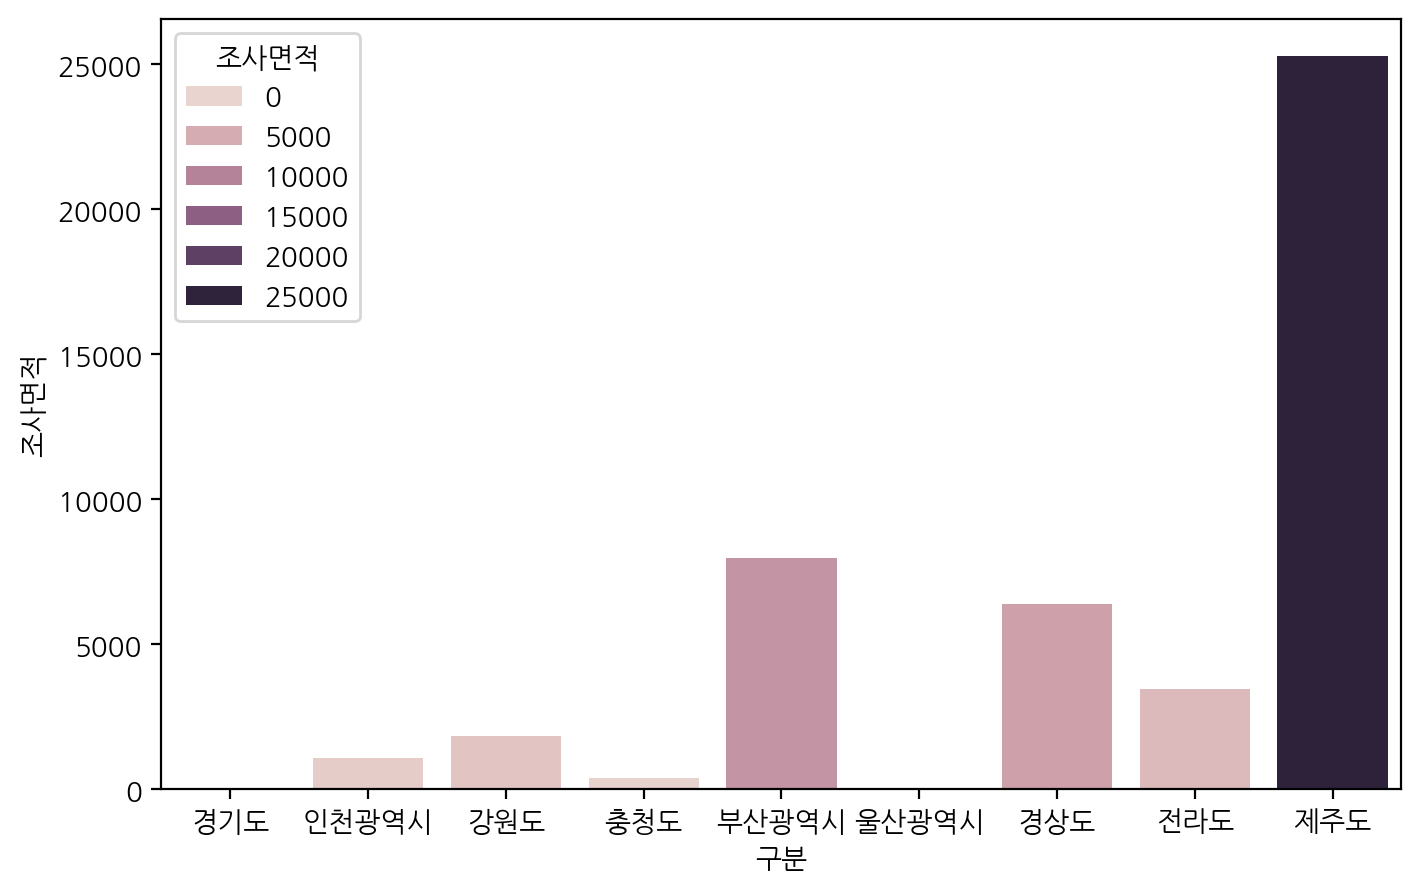

In [312]:
plt.figure(figsize=(8,5))
sns.barplot(전국_해양쓰레기_조사, x="구분", y="조사면적", hue="조사면적");

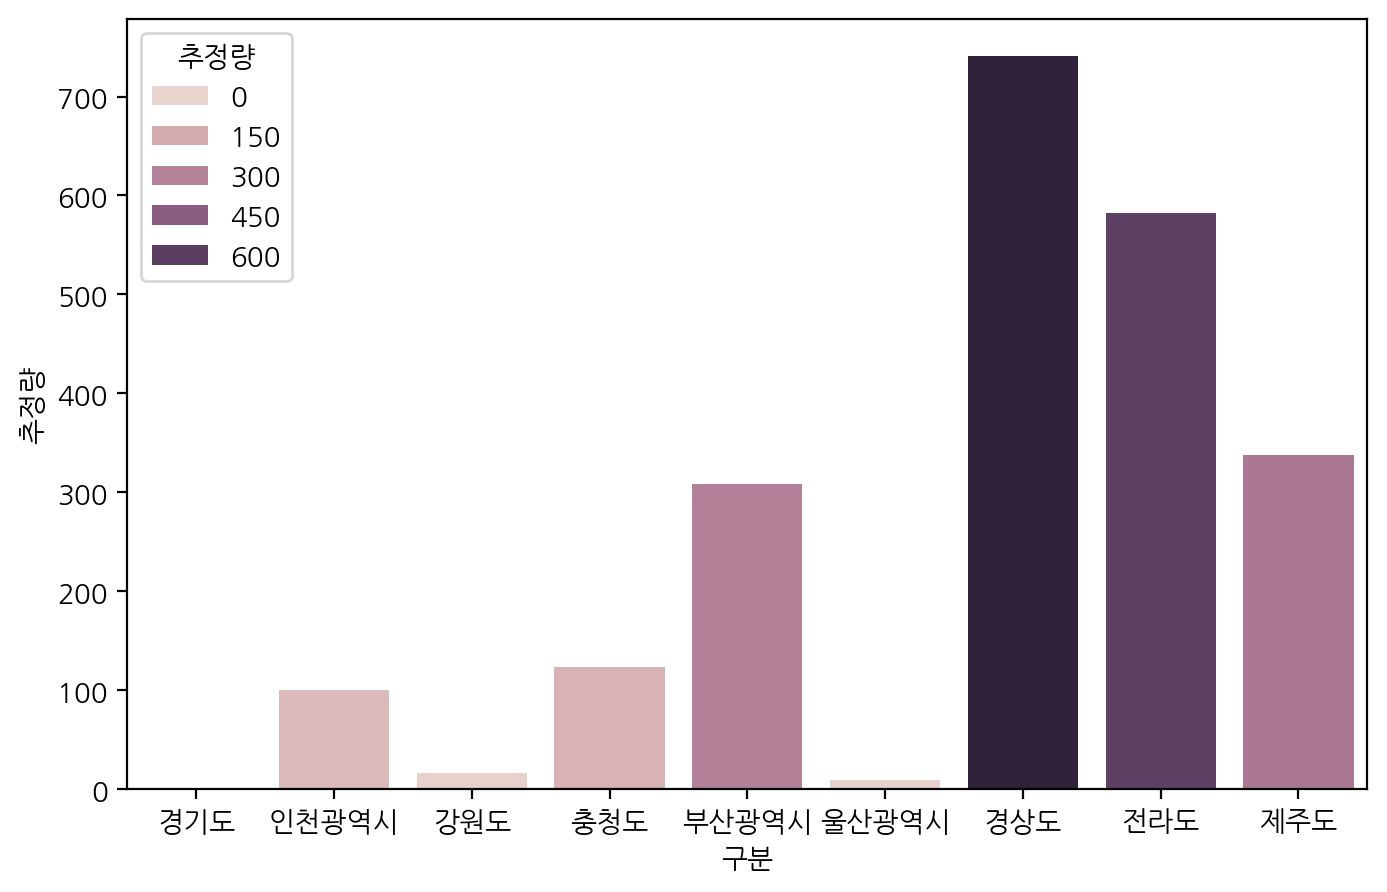

In [311]:
plt.figure(figsize=(8,5))
sns.barplot(전국_해양쓰레기_조사, x="구분", y="추정량", hue="추정량");

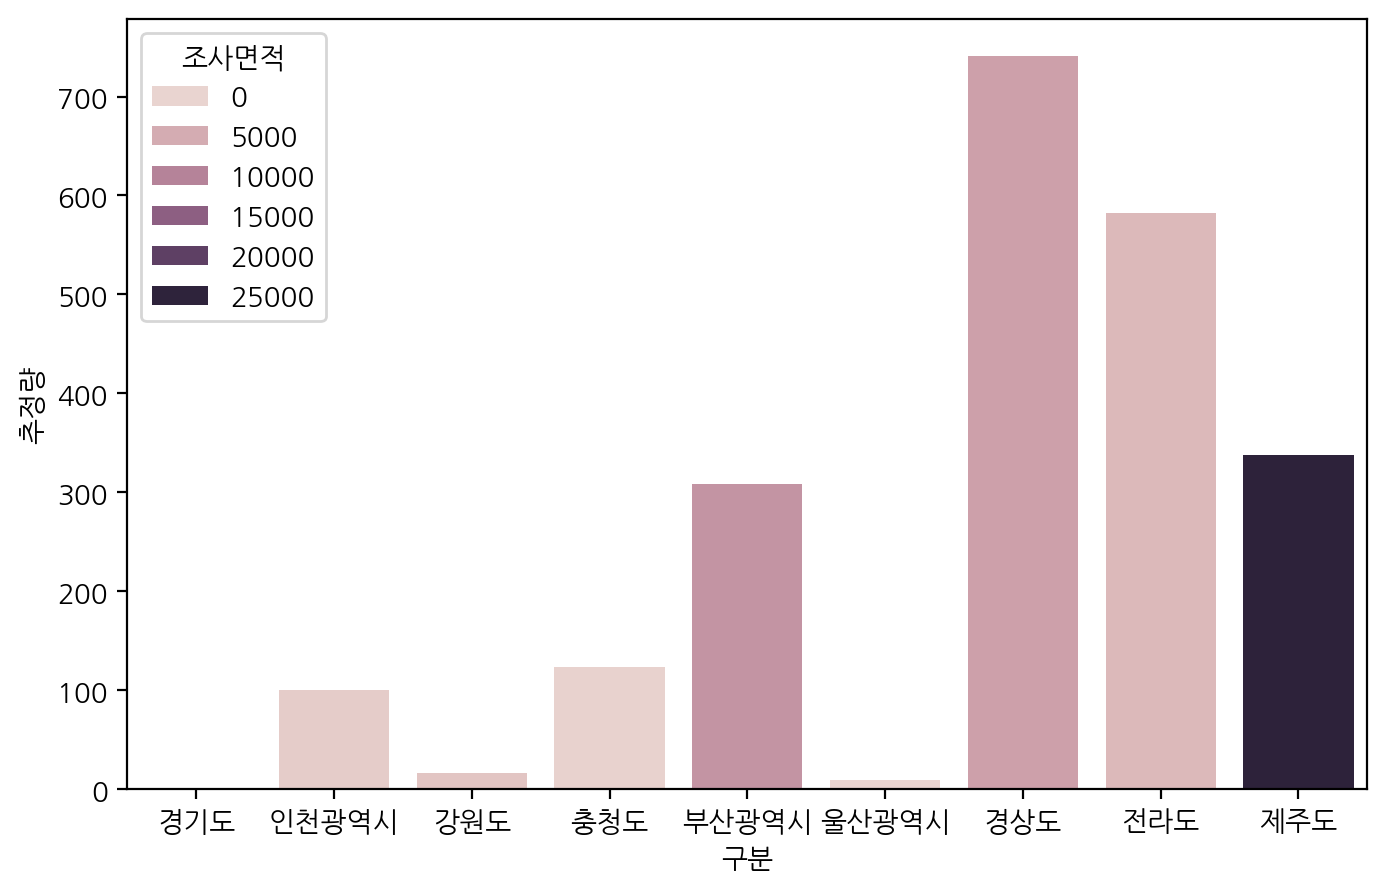

In [320]:
plt.figure(figsize=(8,5))
sns.barplot(전국_해양쓰레기_조사, x="구분", y="추정량", hue="조사면적");

In [294]:
전국_해양쓰레기_조사.구분.isna().sum()

0

In [295]:
전국_해양쓰레기_조사.조사면적.isna().sum()

0

In [296]:
전국_해양쓰레기_조사.추정량.isna().sum()

0

In [321]:
plt.savefig('해양쓰레기 추정량 그래프.png')

<Figure size 640x480 with 0 Axes>